<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

__Ответ__. AUC-ROC используется в задачах бинарной классификации и бывает полезна в случаях сбалансированных выборок (когда количество объектов положительного класса близко к количеству объектов отрицательного класса).

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

__Ответ__. Использование AUC-PRC предпочтительнее, когда классы в выборке несбалансированны.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

__Ответ__. Внутренние критерии характеризуют качество на данных, которые участвовали в обучении алгоритма, внешние --- качество на новых данных.  
Внутренние критерии используют для подбора параметров выбранной модели алгоритмов (например, веса при признаках в линейной модели).  
Внешние критерии используют, чтобы находить оптимальную сложность модели, в частности, выбирать гиперпараметры (например, оптимальную максимальную глубину решающего дерева, оптимальное количество базовых алгоритмов в композиции и т.п.), и оценивать, насколько хорошо построенный алгоритм работает на реальных новых данных.

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

__Ответ__. Как я понимаю, в вычислении эмпирических критериев всегда участвует выборка, в то время как аналитические критерии не зависят от конкретной выборки. На конкретном примере: любая оценка по кросс-валидации делается на основе выборки и некоего ее разбиения, поэтому кросс-валидация относится к эмпирическим внешним критериям. В свою очередь, контроль сложности алгоритма с помощью регуляризации осуществляется без участия выборки (штраф за сложность алгоритма не зависит от выборки), поэтому относится к аналитическим внешним критериям.

**Вопрос 5**: Что такое критерий регуляризации?

__Ответ__. Это модификация внутреннего критерия путем добавления к нему регуляризатора ("штрафа") за сложность модели, домноженного на некоторый коэффициент $\lambda$ --- коэффициент регуляризации. Такие критерии позволяют бороться с переобучением, т.к. препятствуют построению слишком сложной модели. При работе с линейными моделями наиболее популярными регуляризаторами являются:  
* $L_1$-регуляризатор (лассо, lasso) --- сумма абсолютных значений весов $w_i$ перед признаками:
$\tilde{Q}(w, X) = Q(w, X) + \lambda \sum\limits_{i=1}^d |w_i|$.

* $L_2$-регуляризатор (гребневый, ridge) --- сумма квадратов значений весов $w_i$ перед признаками:
$\tilde{Q}(w, X) = Q(w, X) + \lambda \sum\limits_{i=1}^d w_i^2$.

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [2]:
import pandas as pd
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pd.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Задание**
- Сколько примеров писем в датасете?
- Какова доля плохих писем?
- Какие характерные группы признаков представлены в наборе?

In [3]:
print 'Примеров писем:', X.shape[0]
print 'Доля плохих писем:', np.mean(y)

Примеров писем: 4601
Доля плохих писем: 0.394044772875


In [4]:
for idx, (prefix, descr) in enumerate([('word_freq_', 'Частота встречаемости конкретных слов в письмах'), 
                                       ('char_freq_', 'Частота встречаемости конкретных символов в письмах'),
                                       ('capital_run_', 'Различные статистики по заглавным буквам в письмах')]):
    feature_group = filter(lambda feature: feature.startswith(prefix), feature_names)
    print 'Группа признаков №{} ({} / {}).'.format(idx + 1, len(feature_group), X.shape[1])
    print 'Описание:', descr + '.'
    print 'Названия:', ', '.join(map(lambda feature: feature[len(prefix):], feature_group)) + '.'
    print

Группа признаков №1 (48 / 57).
Описание: Частота встречаемости конкретных слов в письмах.
Названия: make, address, all, 3d, our, over, remove, internet, order, mail, receive, will, people, report, addresses, free, business, email, you, credit, your, font, 000, money, hp, hpl, george, 650, lab, labs, telnet, 857, data, 415, 85, technology, 1999, parts, pm, direct, cs, meeting, original, project, re, edu, table, conference.

Группа признаков №2 (6 / 57).
Описание: Частота встречаемости конкретных символов в письмах.
Названия: ;, (, [, !, $, #.

Группа признаков №3 (3 / 57).
Описание: Различные статистики по заглавным буквам в письмах.
Названия: length_average, length_longest, length_total.



### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


In [5]:
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot as plt

from IPython.display import display

In [6]:
def get_score_names():
    return ['Accuracy', 'Precision', 'Recall', 'F1']

def get_scores(y_true, y_pred):
    return [accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred),
            recall_score(y_true, y_pred),
            f1_score(y_true, y_pred)]

def str_scores(y_true, y_pred):
    return '\n'.join(map(lambda (name, score): name + ': ' + str(score), 
                         zip(get_score_names(), get_scores(y_true, y_pred))))

def decision_tree_prediction(X_train, y_train, X_test):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=7)
    clf.fit(X_train, y_train)
    return clf, clf.predict(X_test)

def knn_prediction(X_train, y_train, X_test):
    clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
    clf.fit(X_train, y_train)
    return clf, clf.predict(X_test)

In [7]:
# Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: 
# train — первые 3000 примеров (≈65%), test — все остальные примеры.
scores = []

train_size = 3000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(3000, 57) (3000,)
(1601, 57) (1601,)


In [8]:
%%time
# Обучите решающее дерево на train. Классифицируйте примеры из test. 
# Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. 
# Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.

model_name = 'Tree'
_, y_pred_tree = decision_tree_prediction(X_train, y_train, X_test)
print model_name
print str_scores(y_test, y_pred_tree)
scores.append([model_name] + get_scores(y_test, y_pred_tree))

Tree
Accuracy: 0.768269831355
Precision: 0.0
Recall: 0.0
F1: 0.0
CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 54.8 ms


/home/sautin1/ProgramFiles/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/sautin1/ProgramFiles/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [9]:
# Какие есть недостатки у получившейся оценки качества на подвыборке test? 
# Как можно сделать оценку качества более информативной?

print np.mean(y_train)
print np.mean(y_test)

0.604333333333
0.0


Существенный недостаток проявляется в разбиении исходной выборки. Все объекты класса 1 попали в обучающую выборку, т.е. в тестовой выборке все объекты принадлежат к классу 0, из-за чего $TP = 0$ и $FN = 0$. Но тогда $precision = 0$ и $F1 = 0$, а подсчет $recall$ вообще не имеет смысла из-за деления на 0.  
Оценку качества можно сделать более информативной, перемешав исходную выборку $X$ перед разбиением на обучающую и тестовую подвыборки. При разбиении необходимо следить, чтобы в обеих выборках были объекты-представители обоих классов.

In [10]:
# Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
print np.mean(y_train), np.mean(y_test)

(3000, 57) (3000,)
(1601, 57) (1601,)
0.394 0.394128669582


In [11]:
%%time
model_name = 'Tree (shuffled)'
clf, y_pred_tree_shuffled = decision_tree_prediction(X_train, y_train, X_test)
print model_name
print str_scores(y_test, y_pred_tree_shuffled)
scores.append([model_name] + get_scores(y_test, y_pred_tree_shuffled))

Tree (shuffled)
Accuracy: 0.902560899438
Precision: 0.917398945518
Recall: 0.827258320127
F1: 0.87
CPU times: user 72 ms, sys: 0 ns, total: 72 ms
Wall time: 73 ms


In [12]:
# Какие признаки оказались наиболее важными для определения спама? 
# Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.

feature_importances_sorted_idx = np.argsort(clf.feature_importances_)[::-1]
feature_importances_idx = filter(lambda idx: clf.feature_importances_[idx] > 0, feature_importances_sorted_idx)
feature_importances = [(feature_names[i], clf.feature_importances_[i]) for i in feature_importances_idx]
print 'Признаков с ненулевой важностью: {} / {}.'.format(len(feature_importances_idx), 
                                                         clf.feature_importances_.shape[0])
print 'Признаки с ненулевой важностью в порядке убывания важности:'
# print '\n'.join(map(str, feature_importances))
print '\n'.join(map(str, feature_importances))

Признаков с ненулевой важностью: 26 / 57.
Признаки с ненулевой важностью в порядке убывания важности:
('char_freq_$', 0.41363373562357197)
('word_freq_remove', 0.17417828248189376)
('char_freq_!', 0.11178063677883558)
('word_freq_hp', 0.064254311225209554)
('capital_run_length_total', 0.037786851785446378)
('word_freq_free', 0.030137961794105196)
('word_freq_edu', 0.023044608313092817)
('capital_run_length_average', 0.022717394050671795)
('word_freq_george', 0.018387456012147852)
('word_freq_money', 0.017912013306133026)
('word_freq_our', 0.016136387647698994)
('word_freq_meeting', 0.015525461200371907)
('word_freq_your', 0.013751559965731412)
('word_freq_hpl', 0.0080497038894778022)
('word_freq_internet', 0.0066831253812141373)
('word_freq_business', 0.0051308545183790955)
('char_freq_(', 0.0035749749487603536)
('word_freq_email', 0.0035583862606672701)
('word_freq_000', 0.0032178011094734695)
('char_freq_[', 0.0031256463321370723)
('char_freq_;', 0.001691344808014964)
('word_freq_mai

In [13]:
# Какое качество дает лучшая константная модель 
# (определяющая класс определенно и вне зависимости от признаков)?

model_name = 'Const'
clf_const = DummyClassifier(strategy='most_frequent')
clf_const.fit(X_train, y_train)
y_pred_const = clf_const.predict(X_test)
print model_name
print str_scores(y_test, y_pred_const)
scores.append([model_name] + get_scores(y_test, y_pred_const))

Const
Accuracy: 0.605871330418
Precision: 0.0
Recall: 0.0
F1: 0.0


/home/sautin1/ProgramFiles/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sautin1/ProgramFiles/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Константная модель каждому объекту предсказывает нулевой класс, поэтому $TP = 0$ и $FP = 0$. А следовательно, $F1 = 0$ и $recall = 0$, а подсчет $precision$ не имеет смысла из-за деления на 0. 

In [14]:
%%time
# Обучите модель KNN и оцените ее качество на test. 
# Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.

model_name = 'KNN'
clf_knn, y_pred_knn = knn_prediction(X_train, y_train, X_test)
print model_name
print str_scores(y_test, y_pred_knn)
scores.append([model_name] + get_scores(y_test, y_pred_knn))

KNN
Accuracy: 0.777014366021
Precision: 0.756554307116
Recall: 0.640253565769
F1: 0.69356223176
CPU times: user 152 ms, sys: 0 ns, total: 152 ms
Wall time: 151 ms


In [15]:
# Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. 
# Оцените качество полученной модели на test. 
# Дает ли подобное преобразование признаков прирост качества для модели KNN?

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
%%time

model_name = 'KNN (scaled)'
clf_knn_scaled, y_pred_knn_scaled = knn_prediction(X_train, y_train, X_test)
print model_name
print str_scores(y_test, y_pred_knn_scaled)
scores.append([model_name] + get_scores(y_test, y_pred_knn_scaled))

KNN (scaled)
Accuracy: 0.88881948782
Precision: 0.908108108108
Recall: 0.798732171157
F1: 0.849915682968
CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 1.14 s


In [17]:
%%time
# Проделайте тот же эксперимент с решающим деревом. 
# Почему масштабирование признаков не влияет на качество решающего дерева, 
# но повышает качество классификации модели KNN?

model_name = 'Tree (shuffled, scaled)'
clf_tree_scaled, y_pred_tree_scaled = decision_tree_prediction(X_train, y_train, X_test)
print model_name
print str_scores(y_test, y_pred_tree_scaled)
scores.append([model_name] + get_scores(y_test, y_pred_tree_scaled))

Tree (shuffled, scaled)
Accuracy: 0.900687070581
Precision: 0.915492957746
Recall: 0.824088748019
F1: 0.867389491243
CPU times: user 68 ms, sys: 0 ns, total: 68 ms
Wall time: 66.6 ms


При построении дерева в каждой вершине происходит разбиение по конкретному значению одного признака (например, $[x_i \le 10]$). В этом случае разные масштабы признаков не мешают построению хорошего дерева, т.к. при построении дерева по факту не происходит сравнения значений между разными признаками.  

В свою очередь, в модели KNN происходит вычисление расстояния между объектами, и сильные отличия в масштабах признаков могут существенно влиять на расстояние между объектами.
Рассмотрим такой пример выборки с тремя объектами, каждый из которых представлен двумя признаками:  
$\begin{pmatrix}
0.99 & 3\\
0.81 & 15\\
0.21 & 12
\end{pmatrix}$  

Расстояния от объекта $x_1$ до остальных объектов:  
$dist(x_1, x_2) \approx 14.0$, $dist(x_1, x_3) \approx 11.0$.  
Ближайшим к $x_1$ является объект $x_3$.

После масштабирования признаков матрица объекты-признаки будет выглядеть так:  
$\begin{pmatrix}
0.55 & -0.79\\
0.24 & 0.57\\
-0.80 & 0.23
\end{pmatrix}$  
Расстояния от объекта $x_1$ до остальных объектов:  
$dist(x_1, x_2) \approx 1.39$, $dist(x_1, x_3) \approx 1.69$.  
После масштабирования признаков ближайшим к $x_1$ стал объект $x_2$.


Конечно, эти рассуждения не универсальны. При масштабировании из значения каждого из признаков вычитается среднее значение по признаку, и разность делится на среднеквадратичное отклонение по признаку. В результате этих преобразований все признаки "уравниваются" (приводятся к одному масштабу).  
Если в выборке есть какой-то шумовой признак, который из-за отсутствия масштабирования не вносит почти никакого вклада в расстояние, то нас, конечно же, это устраивает. Зато после масштабирования этот же признак уже будет вносить существенный вклад в расстояние, что плохо. Возможна и обратная ситуация, когда шумовой признак изначально вносит большой вклад в расстояние, а масштабирование понижает его роль.

In [18]:
# Сравните все обученные модели по всем метрикам.
scores.sort(key=lambda row: row[0])
score_comparison = pd.DataFrame(data=scores, columns=['Name'] + get_score_names())
display(score_comparison)

,Name,Accuracy,Precision,Recall,F1
0,Const,0.605871,0.000000,0.000000,0.000000
1,KNN,0.777014,0.756554,0.640254,0.693562
2,KNN (scaled),0.888819,0.908108,0.798732,0.849916
3,Tree,0.768270,0.000000,0.000000,0.000000
4,Tree (shuffled),0.902561,0.917399,0.827258,0.870000
5,"Tree (shuffled, scaled)",0.900687,0.915493,0.824089,0.867389


Константная модель показала самый худший результат, следующим по качеству идет KNN без масштабирования признаков.
После масштабирования KNN показал намного лучшее качество по всем метрикам.

Качество решающего дерева повысилось после перемешивания выборки, однако масштабирование признаков никак не отразилось на результатах.

В целом, решающее дерево на перемешанной выборке показало наилучшее качество среди всех рассмотренных моделей по метрикам accuracy, recall и F1. KNN с масштабированием признаков дало достаточно близкие результаты, обогнав решающее дерево в метрике precision.

В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель  
2) Решающее дерево  
3) KNN  
4) KNN с масштабированием признаков

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

__Решение__. Пусть $a(x)$ --- бинарный классификатор, который для каждого объекта возвращает не метку класса, а оценку принадлежности положительному классу. Отсортируем объекты $\{x_i\}_{i=1}^{l}$ и ответы на них по неубыванию предсказаний классификатора $a(x)$: $(x_{(1)}, y_{(1)}), ..., (x_{(l)}, y_{(l)})$. Определим долю дефектных пар:  
$DP(a, X^l) = \frac{2}{l(l-1)} \sum\limits_{i < j}^l [y_{(i)} > y_{(j)}] = \frac{2}{l(l-1)} \sum\limits_{i=1}^l \sum\limits_{j=i+1}^l [y_{(i)} > y_{(j)}]$.

Заметим, что значение $DP(a, X^l)\in [0, 1]$, и $DP(a^*, X^l) = 0$, где $a^*$ --- идеальный алгоритм.

Процесс построения ROC-кривой (в пространстве $TPR$ / $FPR$):  
1) все объекты сортируются по неубыванию оценки их принадлежности положительному классу;  
2) начинаем строить кривую из точки $(0; 0)$, которая соответствует порогу $\theta > y_{(l)}$ (все объекты относим к отрицательному классу $\Rightarrow TPR = \frac {TP}{TP + FN} = 0 = \frac {FP}{FP + TN} = FPR$);  
3) постепенно уменьшая порог, относим на каждом шаге новый объект к положительному классу.

Обозначим за $l_+$ количество объектов из положительного класса, а за $l_-$ --- количество объектов отрицательного класса. Заметим, что при добавлении объекта положительного класса $TPR$ увеличивается на $\frac {1}{l_+}$, а при добавлении объекта отрицательного класса $FPR$ увеличивается на $\frac {1}{l_-}$. Будем вычислять $AUC-ROC$ следующим образом: при добавлении каждого объекта положительного класса (т.е. при движении наверх) будем добавлять в $AUC-ROC$ площадь горизонтальной полосы высоты $\frac {1}{l_+}$:
<img src="auc_roc_stripe.png" width='400'>

Тогда $AUC-ROC$ будет вычисляться так:  
$\sum\limits_{i=1}^{l} [\text{при добавлении } x_{(i)} \text{ сдвинулись наверх}]\cdot \text{высота полосы} \cdot \text{ширина полосы} = $  
$= \sum\limits_{i=1}^{l} [{y_{(i)} = 1}]\cdot \frac{1}{l_+} \cdot \sum\limits_{j = i + 1}^l [y_{(j)} = -1]\cdot \frac{1}{l_-} = $  
$= \frac{1}{l_+ l_-}\sum\limits_{i=1}^l [y_{(i)} = 1]\cdot \sum\limits_{j=i+1}^l [y_{(j)} = -1] = $  
$= \frac{1}{l_+ l_-}\sum\limits_{i=1}^l \sum\limits_{j=i+1}^l [y_{(i)} = 1]\cdot [y_{(j)} = -1] = $  
$= \frac{1}{l_+ l_-}\sum\limits_{i=1}^l \sum\limits_{j=i+1}^l [y_{(i)} > y_{(j)}] = $  
$= \frac{1}{l_+ l_-} \frac{l(l-1)}{2} (\frac{2}{l(l-1)} \sum\limits_{i=1}^l \sum\limits_{j=i+1}^l [y_{(i)} > y_{(j)}]) = $  
$= \frac{1}{l_+ l_-} \frac{l(l-1)}{2} DP(a, X^l)$.  

Получили связь между долей дефектных пар и $AUC-ROC$.

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.


__Решение__. Пример для $l=8$:  
$y = (-1, 1, -1, 1, -1, 1, 1, -1)$,  
$b(x) = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8)$.

ROC-кривая:

In [19]:
def draw_roc_curve(y_true, y_score, label=None):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], color='grey')
    plt.grid()
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return fpr, tpr

def draw_prc_curve(y_true, y_score, label=None):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    plt.plot(recall, precision, label=label)
    plt.grid()
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    return recall, precision

ROC-AUC:  0.5


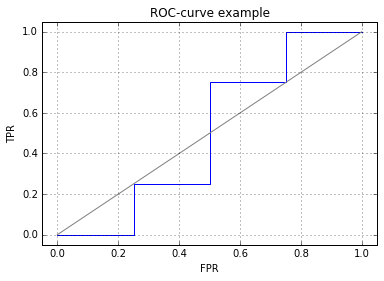

In [20]:
plt.title('ROC-curve example')
y_true = np.array([-1, 1, -1, 1, 1, -1, 1, -1])
y_score = np.arange(0.1, 0.9, 0.1)
draw_roc_curve(y_true, y_score)
print 'ROC-AUC: ', roc_auc_score(y_true, y_score)

Также $AUC-ROC$ может быть равен $0.5$ в случае, если оценки принадлежности положительному классу совпадают для всех объектов. Тогда кривая будет представлять из себя прямую (диагональ квадрата), на которой можно будет отметить только 2 точки: $(0, 0)$ и $(1, 1)$.

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



_Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?_

Да, верно.  

Константный алгоритм выбирает самый часто встречаемый класс на обучающей выборке и возвращает его в качестве предсказания на любом объекте. Это поведение в случае меток классов $\{-1, 1\}$ аналогично следующему: просуммировать метки классов на всех объектах обучающей выборки и сравнить с нулем. Итак, для константного алгоритма оценкой принадлежности является сумма меток классов объектов обучающей выборки, а порогом --- 0.  

KNN для объекта $x$ выбирает самый часто встречаемый класс среди $k$ ближайших соседей $x$. Аналогично случаю с константным алгоритмом: оценка принадлежности положительному классу --- сумма меток классов $k$ ближайших соседей, порог --- 0.

Решающее дерево для объекта $x$ строит оценку принадлежности положительному классу как долю объектов положительного класса в листе, в котором оказался $x$. Порог, соответственно, равен $0.5$.

In [21]:
labels = ['Const', 'KNN', 'KNN (scaled)', 'Tree (scaled)']
clfs = [clf_const, clf_knn, clf_knn_scaled, clf_tree_scaled]
y_scores = [clf.predict_proba(X_test)[:, 1] for clf in clfs]

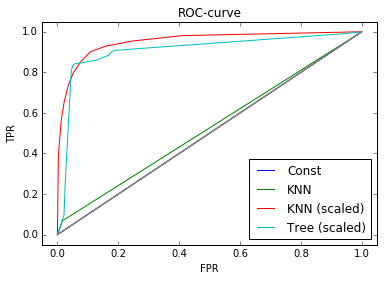

In [22]:
for label, y_score in zip(labels, y_scores):
    draw_roc_curve(y_test, y_score, label=label)
plt.title('ROC-curve')
plt.legend(loc='lower right')

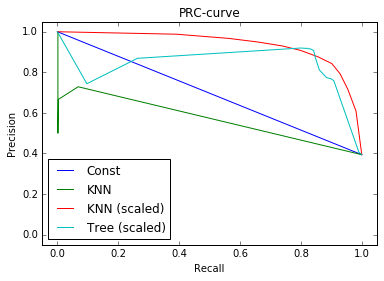

In [23]:
precisions, recalls = [], []
for label, y_score in zip(labels, y_scores):
    recall, precision = draw_prc_curve(y_test, y_score, label=label)
    recalls.append(recall)
    precisions.append(precision)
plt.title('PRC-curve')
plt.legend(loc='lower left')

In [24]:
auc_rocs = [roc_auc_score(y_test, y_score) for y_score in y_scores]
auc_rocs_comparison = pd.DataFrame(data=zip(labels, auc_rocs), columns=['Name', 'AUC-ROC'])
display(auc_rocs_comparison)

,Name,AUC-ROC
0,Const,0.500000
1,KNN,0.525816
2,KNN (scaled),0.952378
3,Tree (scaled),0.908641


Наибольшего значения $AUC-ROC$ достиг алгоритм KNN c масштабированием признаков. Следующим по убыванию результата идет решающее дерево.

_Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?_

In [25]:
for label, recall, precision in zip(labels, recalls, precisions):
    idxs = precision >= 0.9
    print label + ':', np.max(recall[idxs])

Const: 0.0
KNN: 0.00158478605388
KNN (scaled): 0.798732171157
Tree (scaled): 0.841521394612


### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки  

Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

In [26]:
# Выберите схему кросс-валидации, одну из перечисленных выше. 
# Зафиксируйте разбиение кросс-валидации обучающей выборки. 
# Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. 
# Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, 
# должен быть строго фиксированным.

cv = StratifiedShuffleSplit(y=y_train, n_iter=3, test_size=0.2, random_state=42)

# Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
scoring = 'roc_auc'

In [27]:
# Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. 
# Параметры для настройки: критерий разбиения, максимальная глубина, 
# число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
estimator_tree = DecisionTreeClassifier()
print estimator_tree.get_params().keys()

['presort', 'splitter', 'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'criterion', 'random_state', 'max_features', 'max_depth', 'class_weight']


In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 20, 2) + [None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': range(1, 20, 2)
}

In [29]:
%%time
grid_cv_tree = GridSearchCV(estimator_tree, param_grid, scoring, n_jobs=2)
grid_cv_tree.fit(X_train, y_train)
print grid_cv_tree.best_score_
print grid_cv_tree.best_params_

0.953289301011
{'max_features': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15}
CPU times: user 7.65 s, sys: 136 ms, total: 7.78 s
Wall time: 25.6 s


In [30]:
# Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. 
# Параметры для настройки: число соседей, функция расстояния, 
# схема взвешивания (или часть из этих параметров).

estimator_knn = KNeighborsClassifier()
print estimator_knn.get_params().keys()

['n_neighbors', 'n_jobs', 'algorithm', 'metric', 'metric_params', 'p', 'weights', 'leaf_size']


In [31]:
param_grid = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [3],
    'weights': ['uniform', 'distance'],
}

In [32]:
%%time
grid_cv_knn = GridSearchCV(estimator_knn, param_grid, scoring, n_jobs=2)
grid_cv_knn.fit(X_train, y_train)
print grid_cv_knn.best_score_
print grid_cv_knn.best_params_

0.967227750694
{'n_neighbors': 14, 'metric': 'manhattan', 'weights': 'distance', 'p': 3}
CPU times: user 5.42 s, sys: 244 ms, total: 5.67 s
Wall time: 7min 12s


In [33]:
# Сравните полученные модели с моделями из предыдущих заданий.
# Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении.
# Сравнение нужно проводить только по метрике, которая оптимизировалась.

labels_with_grid = ['Tree (GridSearch)', 'KNN (GridSearch)']
clfs_with_grid = [grid_cv_tree.best_estimator_, grid_cv_knn.best_estimator_]
scores_with_grid = [clf.predict_proba(X_test)[:, 1] for clf in clfs_with_grid]
auc_rocs_with_grid = [roc_auc_score(y_test, y_score) for y_score in scores_with_grid]
comparison_with_grid = pd.DataFrame(data=zip(labels + labels_with_grid, auc_rocs + auc_rocs_with_grid), 
                                    columns=['Name', 'AUC-ROC'])
display(comparison_with_grid)

,Name,AUC-ROC
0,Const,0.500000
1,KNN,0.525816
2,KNN (scaled),0.952378
3,Tree (scaled),0.908641
4,Tree (GridSearch),0.953714
5,KNN (GridSearch),0.966837


Подбор параметров по сетке помог улучшить обе выигрывающие по метрике $AUC-ROC$ модели. Решающее дерево с подобранными параметрами улучшило свой результат на 2.8%. KNN после подбора параметров увеличил свой $AUC-ROC$ на 2%, показывая в принципе наилучший результат по этой метрике среди всех рассмотренных в этом задании моделей.

<h1 align="center">Примеры</h1> 

## Обучение решающего дерева

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [35]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

2 petal length (cm), importance = 0.59
3 petal width (cm), importance = 0.41
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

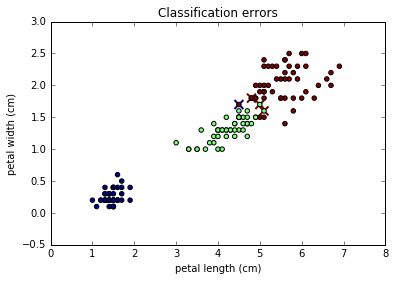

In [36]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [37]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [38]:
!dot -Tpng tree.dot -o tree.png

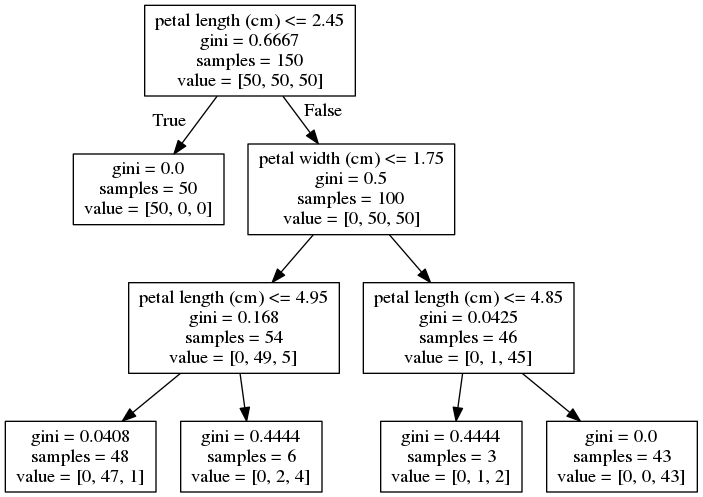

In [39]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [40]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [41]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [43]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 420 ms, sys: 0 ns, total: 420 ms
Wall time: 420 ms


#### График, демонстрирующий оптимальность выбора числа соседей

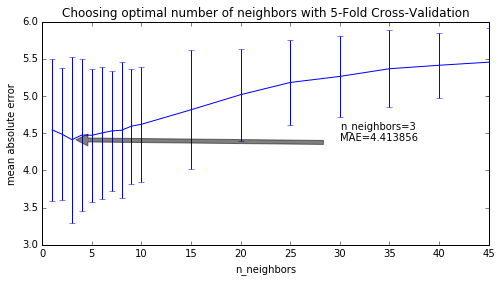

In [44]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))